# Mod 3 Project
## Classification of
mod3project

## Important Functions

In [1056]:
#import files

from bs4 import BeautifulSoup
import pandas as pd
import json
import time
import requests
import numpy as np
import copy
import seaborn as sns
import matplotlib.pyplot as plt



In [5]:
def get_reviews(appid, start_offset=0, fil='updated', review_type='all'):
    url = 'https://store.steampowered.com'
    reviews = '/appreviews/'
    p = {'day_range':'9223372036854775807', 
         'start_offset':start_offset, 
         'language':'english', 
         'filter':fil, 
         'review_type':review_type,
         'purchase_type':'all'}
    r = requests.get(url+reviews+str(appid)+'?json=1?', params=p).json()
    return r

In [6]:
def get_review_content(df):
    return [df['reviews'][i]['review'] for i in range(len(df['reviews']))]

In [7]:
def get_steamlist():
    return requests.get('http://api.steampowered.com/ISteamApps/GetAppList/v0002/').json()

games_df = pd.DataFrame(get_steamlist()['applist']["apps"])
games = get_steamlist()['applist']["apps"]

In [8]:
def get_appid(name, games):
    for i in range(len(games['name'])):
        if games['name'][i].title() == name.title():
            return games['appid'][i]
    return "Did not find"

def get_game_info(appid):
    url = 'https://store.steampowered.com'
    ids = str(appid)
    r = requests.get(url+'/api/appdetails?appids='+ids).json()
    return r

In [9]:
# we ended last on Tuesday on 15,000

def retrieve_steam_data(start, end):
    data_from_steam_ = []
    for num, game in enumerate(games[start: end]):
        if game["appid"] >= 10:
            data_from_steam_.append(get_game_info(game["appid"]))
        if num % 100 == 0:
            t = np.random.choice([1,1.1,1.2,1.3,1.4,1.5])
            print(num, t)
            time.sleep(t)
    return data_from_steam_ 
    
def get_reviews(appid, start_offset=0, fil='updated', review_type='all'):
    url = 'https://store.steampowered.com'
    reviews = '/appreviews/'
    p = {'day_range':'9223372036854775807', 
         'start_offset':start_offset, 
         'language':'english', 
         'filter':fil, 
         'review_type':review_type,
         'purchase_type':'all'}
    r = requests.get(url+reviews+str(appid)+'?json=1?', params=p).json()
    return r


In [10]:
def save_data(data, file_to_save_to):
        """takes in a filename to save to"""
        with open(file_to_save_to, 'w') as outfile:
            json.dump(data, outfile)

In [11]:
def open_save_data(file_to_open):
        """takes in a filename to open
           return """
        with open(file_to_open) as datajson:
            new_data =json.load(datajson)
        return new_data

# Open Json Files

In [402]:
k10 = open_save_data("10K_data.json")
k15 = open_save_data("15K_data.json")
k20 = open_save_data("test_20k.json")
k30 = open_save_data("30K_data.json")
k40_1k = open_save_data("1000_data_30000.json")
k40_2k = open_save_data("2000_data_30000.json")
k40_3k = open_save_data("3000_data_30000.json")
k40_4k = open_save_data("4000_data_30000.json")
k40_5k = open_save_data("5000_data_30000.json")
k40_6k = open_save_data("6000_data_30000.json")
k40_7k = open_save_data("7000_data_30000.json")
k40_8k = open_save_data("8000_data_30000.json")
k40_9k = open_save_data("9000_data_30000.json")
k40_10k = open_save_data("test_40k.json")
k50 = open_save_data("50K_data.json")
k60 = open_save_data("60K_data.json")
t1 = open_save_data('1000_data_60000.json')
t2 = open_save_data('2000_data_60000.json')
t3 = open_save_data('3000_data_60000.json')
t4 = open_save_data('4000_data_60000.json')
t5 = open_save_data('5000_data_60000.json')
k76 = open_save_data('76K_data.json')

# Combine to 1 complete dataset

In [491]:
all_30K = np.array(k10+k15+k20+k30)
all_40K = k10+k15+k20+k30+k40_1k+k40_2k+k40_3k+k40_4k+k40_5k+k40_6k+k40_7k+k40_8k+k40_9k+k40_10k
all_60k = all_50K + k60
k65 = t1+t2+t3+t4+t5
some_30K_40K = k40_1k+k40_2k+k40_3k+k40_4k+k40_5k+k40_6k+k40_7k+k40_8k+k40_9k+k40_10k
k60_k76 = k65+k76
all_50K = all_40K + k50
all_76K = all_60K + k65+k76

# Functions for Initial Clean

In [1089]:
# helper for the clean non_id
def del_unwanted(dic, unwanted_lst):
    dic_copy = copy.deepcopy(dic)
    for key in unwanted_lst:
        if key in dic_copy:
            del dic_copy[key]
    return dic_copy

def clean_non_id_data(games_list, start, end):
    data_dic_lst = []
    data_f = copy.deepcopy(games_list)
    for game in data_f[start:end]:
        if type(game) == dict:
            for key, val in game.items():
                if "success" in val:
                        del val["success"]
                if val != {}:
                    new_val = del_unwanted(val["data"], ["header_image", "website", "packages", "package_groups",
                                                        "screenshots", "movies", "support_info", "background",
                                                        "content_descriptors", "controller_support", "drm_notice",
                                                        "ext_user_account_notice", "detailed_description", 
                                                        "short_description", "legal_notice", "linux_requirements",
                                                        "mac_requirements", "fullgame", "publishers", "demos",
                                                        "pc_requirements", "release_date", 'alternate_appid'])
            
                    data_dic_lst.extend([new_val])
    return data_dic_lst

## Removing Columns we don't need

In [1467]:
cleaned_76K = clean_non_id_data(all_76K,0, len(all_76K))
len(cleaned_76K)

25953

In [1070]:
# final copy
# save_data(cleaned_76K, 'ALL_cleaned.json')

## More cleaning organizing columns

In [1435]:
cats = ["Single-player", "Multi-player", 'Online Multi-Player', 'Local Multi-Player', 'Co-op', 
                'Online Co-op', 'Local Co-op', 'Shared/Split Screen', 'Cross-Platform Multiplayer', ]
genres = ['Action','Adventure', 'Indie', 'Casual', 'Massively Multiplayer', 'Racing', 'RPG', "Simulation", 
          "Strategy", "Sports", "Free to Play", "Early Access"]

platforms_lst = ["windows", "mac", "linux"]

def get_clean_dummies(clean_dic, desc_key, descriptions, keep=True):
    if keep:
        cleaned = copy.deepcopy(clean_dic)
    else:
        cleaned = clean_dic
    for data in cleaned:
        for key in descriptions:
            data[key] = 0
        if desc_key in data:
            for cat in data[desc_key]:
                if cat["description"] in descriptions:
                    data[cat["description"]] = 1
            del data[desc_key]
    return cleaned


def get_platform_dummies(clean_dic, keep=True):
    if keep:
        cleaned = copy.deepcopy(clean_dic)
    else:
        cleaned = clean_dic
    for data in cleaned: 
        if "platforms" in data:
            for key in platforms_lst:
                data[key] = 0 
                if key in data["platforms"]:
                    data[key] = int(data["platforms"][key])
        else:
            for key in platforms_lst:
                data[key] = 0 
        del data["platforms"]
    return cleaned

def get_total_from_dic(clean_dic, column, keep=True):
    if keep:
        cleaned = copy.deepcopy(clean_dic)
    else:
        cleaned = clean_dic
    for data in cleaned:
        if column in data:
            data[column] = data[column]["total"]
        else:
            data[column] = 0
    return cleaned

def get_metas_from_dic(clean_dic, keep=True):
    if keep:
        cleaned = copy.deepcopy(clean_dic)
    else:
        cleaned = clean_dic
    for data in cleaned:
        if "metacritic" in data:
            data["metacritic"] = data["metacritic"]["score"]
        else:
            data["metacritic"] = 0
    return cleaned

def clean_dev(clean_dic, keep=True):
    if keep:
        cleaned = copy.deepcopy(clean_dic)
    else:
        cleaned = clean_dic
    cleaned = copy.deepcopy(clean_dic)
    for data in cleaned:
        if "developers" in data:
            data["developers"] = ", ".join(data["developers"])
        else:
            data["developers"] = ""
    return cleaned

def dlc_reformatting(clean_dic, keep=True):
    if keep:
        cleaned = copy.deepcopy(clean_dic)
    else:
        cleaned = clean_dic
    for data in cleaned:
        if "dlc" in data:
            data["dlc"] = len(data["dlc"])
        else:
            data["dlc"] = 0
    return cleaned

# def date_reformatting(clean_dic, keep=True):
#     if keep:
#         cleaned = copy.deepcopy(clean_dic)
#     else:
#         cleaned = clean_dic
#     for data in cleaned:
#         if "release_date" in data:
#             if data["release_date"]["date"][:3] in months:
#                 data["release_date"] = months[data["release_date"]["date"][:3]]
#             else:
#                 data["release_date"] = 0
#         else:
#                 data["release_date"] = 0
#     return cleaned

def convert_to_1_0(clean_dic, keep=True):
    if keep:
        cleaned = copy.deepcopy(clean_dic)
    else:
        cleaned = clean_dic
    for data in cleaned:
        if "is_free" in data:
            data["is_free"] = int(data["is_free"])
        else:
            data["is_free"] = 0
    return cleaned

def clean_money(clean_dic, nans_to_zero=False, keep=True):
    if keep:
        cleaned = copy.deepcopy(clean_dic)
    else:
        cleaned = clean_dic
    for data in cleaned:
        if "price_overview" in data:
            if data["price_overview"]["currency"] == "USD":
                data["price_overview"] = round(data["price_overview"]["final"]*.01, 2)
            else:
                data["price_overview"] = 0
        else:
            if nans_to_zero:
                data["price_overview"] = 0
    return cleaned

def clean_language(clean_dic, keep=True):
    if keep:
        cleaned = copy.deepcopy(clean_dic)
    else:
        cleaned = clean_dic
    for data in cleaned:
        if "supported_languages" in data:
            data["num_supported_languages"] = len(data["supported_languages"].split(","))
            del data["supported_languages"]
        else:
             data["num_supported_languages"] = 1
        
    return cleaned


In [1436]:
cats = ["Single-player", "Multi-player", 'Online Multi-Player', 'Local Multi-Player', 'Co-op', 
                'Online Co-op', 'Local Co-op', 'Shared/Split Screen', 'Cross-Platform Multiplayer', ]
genres = ['Action','Adventure', 'Indie', 'Casual', 'Massively Multiplayer', 'Racing', 'RPG', "Simulation", 
          "Strategy", "Sports", "Free to Play", "Early Access"]

def clean_data(dirty_dic, keep=False):
    clean_money(dirty_dic, True, keep)
    clean_dev(dirty_dic, keep)
    convert_to_1_0(dirty_dic, keep)
    dlc_reformatting(dirty_dic, keep)
    get_clean_dummies(dirty_dic, "categories", cats, keep)
    get_clean_dummies(dirty_dic, "genres", genres, keep)
    get_total_from_dic(dirty_dic, "recommendations", keep)
    get_total_from_dic(dirty_dic, "achievements", keep)
    get_platform_dummies(dirty_dic, keep)
    get_metas_from_dic(dirty_dic, keep)
    clean_language(dirty_dic, keep=keep)
    return pd.DataFrame(dirty_dic)

In [1468]:
df_cleaned_76K = clean_data(cleaned_76K)
df_cleaned_76K.shape
#all cleaned

(25953, 38)

# Quick Exploration of the Data

In [1439]:
df_cleaned_76K.columns

Index(['Action', 'Adventure', 'Casual', 'Co-op', 'Cross-Platform Multiplayer',
       'Early Access', 'Free to Play', 'Indie', 'Local Co-op',
       'Local Multi-Player', 'Massively Multiplayer', 'Multi-player',
       'Online Co-op', 'Online Multi-Player', 'RPG', 'Racing',
       'Shared/Split Screen', 'Simulation', 'Single-player', 'Sports',
       'Strategy', 'about_the_game', 'achievements', 'developers', 'dlc',
       'is_free', 'linux', 'mac', 'metacritic', 'name',
       'num_supported_languages', 'price_overview', 'recommendations',
       'required_age', 'reviews', 'steam_appid', 'type', 'windows'],
      dtype='object')

In [1096]:
df_cleaned_76K.describe()

,Action,Adventure,Casual,Co-op,Cross-Platform Multiplayer,Early Access,Free to Play,Indie,Local Co-op,Local Multi-Player,...,is_free,linux,mac,metacritic,num_supported_languages,price_overview,recommendations,release_date,steam_appid,windows
count,25953.000000,25953.000000,25953.000000,25953.000000,25953.000000,25953.000000,25953.000000,25953.000000,25953.000000,25953.000000,...,25953.000000,25953.000000,25953.000000,25953.000000,25953.000000,25953.000000,2.595300e+04,25953.0,2.595300e+04,25953.000000
mean,0.342542,0.263862,0.259508,0.104150,0.062228,0.056834,0.062806,0.515123,0.026818,0.042115,...,0.122375,0.212153,0.317420,3.747544,3.252187,6.244652,4.027010e+02,0.0,5.721254e+05,0.999306
std,0.474569,0.440734,0.438373,0.305461,0.241574,0.231529,0.242618,0.499781,0.161553,0.200854,...,0.327725,0.408840,0.465481,16.192600,4.351416,30.270805,1.534542e+04,0.0,2.530525e+05,0.026327
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,0.0,1.000000e+01,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,0.0,3.693700e+05,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,2.990000,0.000000e+00,0.0,5.567100e+05,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,4.000000,7.990000,0.000000e+00,0.0,7.799340e+05,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,96.000000,29.000000,4500.000000,2.182507e+06,0.0,1.055950e+06,1.000000


In [1446]:
df_cleaned_76K[df_cleaned_76K.price_overview > 100]

,Action,Adventure,Casual,Co-op,Cross-Platform Multiplayer,Early Access,Free to Play,Indie,Local Co-op,Local Multi-Player,...,metacritic,name,num_supported_languages,price_overview,recommendations,required_age,reviews,steam_appid,type,windows
1641,0,0,0,0,0,0,0,0,0,0,...,0,VEGAS Pro 15 Edit Steam Edition,4,359.00,0,0,NaN,689790,game,1
2171,0,0,0,0,0,0,0,0,0,0,...,0,Strata Design 3D SE - CX Upgrade,1,149.99,0,0,NaN,671070,dlc,1
2709,1,1,0,0,0,0,0,1,0,0,...,0,CrisisActionVR,2,199.99,0,0,NaN,648070,game,1
6044,0,0,0,0,0,0,0,0,0,0,...,0,Marmoset Toolbag 3,1,189.00,0,0,NaN,550060,game,1
6258,0,0,0,0,0,0,1,0,0,0,...,0,Skyforge - Costume Booster Pack,3,119.99,0,0,NaN,546374,dlc,1
9802,0,0,0,0,0,0,0,0,0,0,...,0,ADR-Labelling Game,4,595.99,0,0,NaN,821800,game,1
9971,1,1,0,0,0,0,0,1,0,0,...,0,INFINITY CHALLENGE,1,199.99,0,0,NaN,819660,game,1
10003,0,0,0,0,0,0,0,0,0,0,...,0,Facerig Studio for Individual VTubers w/Live2D,9,450.00,0,0,NaN,816940,dlc,1
10094,0,0,0,0,1,0,1,0,0,0,...,0,Call of War: Global Domination Pack,11,199.99,0,0,NaN,815356,dlc,1
10221,0,0,0,0,0,0,0,0,0,0,...,0,Dollal Simulator Gold Edition,1,199.99,0,0,NaN,807410,dlc,1


/Users/flatironschool/anaconda3/lib/python3.7/site-packages/pandas/plotting/_misc.py:108: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  ax.set_xlim(boundaries_list[j])
/Users/flatironschool/anaconda3/lib/python3.7/site-packages/pandas/plotting/_misc.py:109: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0, top=0.0
  ax.set_ylim(boundaries_list[i])
/Users/flatironschool/anaconda3/lib/python3.7/site-packages/pandas/plotting/_misc.py:100: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  ax.set_xlim(boundaries_list[i])


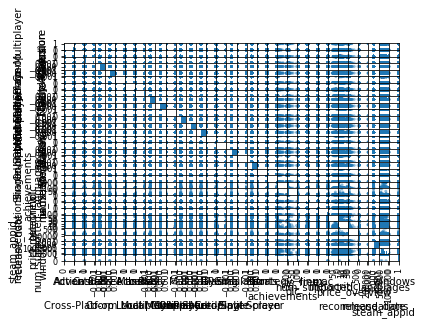

In [461]:
pd.plotting.scatter_matrix(df_clean_30K, figsize);

Alot of variables

# Gathering Review Data

## Functions to Clean

In [ ]:
#def clean_text(text):

def clean_review(lst_reviews):
    check = ['review_score','total_positive', 'total_negative', 'total_reviews']
    data_storage = []
    for rev in lst_reviews:
        app_id = list(rev.keys())[0]
        review_dict = {}
        review_dict["steam_appid"] = int(app_id)
        review_dict["reviews"] = ""
        for key in check:
            if "query_summary" in rev[app_id]:
                if key in rev[app_id]["query_summary"]:
                    review_dict[key] = rev[app_id]["query_summary"][key]
        if "reviews" in rev[app_id]:
            for text in rev[app_id]["reviews"]:
                review_dict["reviews"] += " " + text["review"]
        data_storage.append(review_dict)
    return data_storage

In [1448]:
review_try_1 = open_save_data("reviews_from_first_clean30k.json")

In [1449]:
review_try_2 = open_save_data("reviews_from_clean30k_50k.json")

In [1450]:
review_try_3 = open_save_data("reviews_from_clean50K_60K.json")

In [1451]:
review_try_4 = open_save_data("reviews_from_clean60K_76K.json")

In [1104]:
review_try_4[0]

{'10': {'success': 1,
  'query_summary': {'num_reviews': 20,
   'review_score': 9,
   'review_score_desc': 'Overwhelmingly Positive',
   'total_positive': 32367,
   'total_negative': 964,
   'total_reviews': 33331},
  'reviews': [{'recommendationid': '49803728',
    'author': {'steamid': '76561198407734752',
     'num_games_owned': 39,
     'num_reviews': 9,
     'playtime_forever': 526,
     'playtime_last_two_weeks': 1,
     'last_played': 1552778818},
    'language': 'english',
    'review': 'Perfect childhood game!',
    'timestamp_created': 1553770027,
    'timestamp_updated': 1553770027,
    'voted_up': True,
    'votes_up': 0,
    'votes_funny': 0,
    'weighted_vote_score': 0,
    'comment_count': 0,
    'steam_purchase': True,
    'received_for_free': False,
    'written_during_early_access': False},
   {'recommendationid': '49802949',
    'author': {'steamid': '76561198815796326',
     'num_games_owned': 18,
     'num_reviews': 1,
     'playtime_forever': 212,
     'playtime_

In [1452]:
review_combo = review_try_1 + review_try_2 + review_try_3 + review_try_4

In [1453]:
len(review_combo)

25953

In [1454]:
review_for_df_final = clean_review(review_combo)

Making sure our data two DF match up

In [1478]:
df_cleaned_final_final = df_cleaned_76K.drop("reviews", axis=1).copy()

In [1479]:
len(review_for_df_final)

25953

In [1480]:
len(df_cleaned_final_final)

25953

In [1473]:
# df for all the reviews
df_all_76K_rev = pd.DataFrame(review_for_df_final)

In [1132]:
df_all_76K_rev.to_json("FINAL_REVIEW.json")

## Removing Duplicates

In [1474]:
# remove duplicates from reviews
df_rev_no_dups_final = df_all_76K_rev.drop_duplicates("steam_appid")

In [1475]:
df_rev_no_dups_final.shape

(22646, 6)

In [1482]:
# remove duplicates from original df of game info
df_cleaned_final_final = df_cleaned_final_final.drop_duplicates("steam_appid")

In [1483]:
df_cleaned_final_final.shape

(22646, 37)

## Sort and Merge Review and game info DF

In [1484]:
df_review_final = df_rev_no_dups_final.sort_values("steam_appid")

In [1485]:
df_cleaned_final = df_cleaned_final_final.sort_values("steam_appid")

In [1486]:
df_cleaned_final.shape

(22646, 37)

In [1487]:
df_review_final.shape

(22646, 6)

In [1488]:
final_df = df_cleaned_final.merge(df_review_final, on="steam_appid")

In [1491]:
final_df

,Action,Adventure,Casual,Co-op,Cross-Platform Multiplayer,Early Access,Free to Play,Indie,Local Co-op,Local Multi-Player,...,recommendations,required_age,steam_appid,type,windows,review_score,reviews,total_negative,total_positive,total_reviews
0,1,0,0,0,0,0,0,0,0,1,...,65391,0,10,game,1,9.0,Perfect childhood game! Acest joc pot sa spun...,964.0,32367.0,33331.0
1,1,0,0,0,0,0,0,0,0,1,...,2786,0,20,game,1,8.0,i have no idea what im doing. I've always lik...,405.0,2172.0,2577.0
2,1,0,0,0,0,0,0,0,0,0,...,1979,0,30,game,1,8.0,Too many hicks in this game! Zivoragnom!!! Ve...,191.0,1660.0,1851.0
3,1,0,0,0,0,0,0,0,0,1,...,922,0,40,game,1,8.0,Shame no one plays it its kinda like roblox h...,134.0,708.0,842.0
4,1,0,0,0,0,0,0,0,0,0,...,4304,0,50,game,1,8.0,"Loved half-life 1, one of my favorite games. ...",163.0,2897.0,3060.0
5,1,0,0,0,0,0,0,0,0,0,...,2086,0,60,game,1,8.0,Quality Best game 10/10 and I love playing wi...,353.0,1870.0,2223.0
6,1,0,0,0,0,0,0,0,0,0,...,22113,0,70,game,1,9.0,Totally fun FPS shooter. It's Half Life...do ...,553.0,13736.0,14289.0
7,1,0,0,0,0,0,0,0,0,0,...,8807,0,80,game,1,8.0,A singleplayer Counter-Strike?! Great Game. 5...,466.0,4128.0,4594.0
8,1,0,0,0,0,0,0,0,0,0,...,3296,0,130,game,1,8.0,Released as the second expansion to the origi...,242.0,2102.0,2344.0
9,1,0,0,0,1,0,1,0,0,0,...,10409,0,440,game,1,8.0,its alright I guess. very such good game i've...,18615.0,286430.0,305045.0


In [1152]:
final_df.to_json("FINAL_DF.json")

In [1153]:
final_df.describe()

,Action,Adventure,Casual,Co-op,Cross-Platform Multiplayer,Early Access,Free to Play,Indie,Local Co-op,Local Multi-Player,...,num_supported_languages,price_overview,recommendations,release_date,steam_appid,windows,review_score,total_negative,total_positive,total_reviews
count,22646.000000,22646.000000,22646.000000,22646.000000,22646.000000,22646.000000,22646.00000,22646.000000,22646.000000,22646.000000,...,22646.000000,22646.000000,2.264600e+04,22646.0,2.264600e+04,22646.000000,22645.000000,22645.000000,22645.000000,22645.000000
mean,0.337322,0.261503,0.264638,0.100901,0.060585,0.057538,0.06085,0.509406,0.027245,0.045218,...,3.250817,6.053175,4.014205e+02,0.0,6.027442e+05,0.999647,2.003003,48.529079,234.787414,283.316494
std,0.472806,0.439463,0.441150,0.301204,0.238572,0.232872,0.23906,0.499923,0.162801,0.207786,...,4.376392,32.217997,1.618673e+04,0.0,2.565940e+05,0.018792,3.004088,1218.969026,6517.368144,7520.408667
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000e+00,0.0,1.000000e+01,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000e+00,0.0,4.220850e+05,1.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,...,1.000000,2.990000,0.000000e+00,0.0,6.089415e+05,1.000000,0.000000,0.000000,1.000000,2.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,...,4.000000,7.990000,0.000000e+00,0.0,8.152325e+05,1.000000,5.000000,4.000000,12.000000,18.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,...,29.000000,4500.000000,2.182507e+06,0.0,1.055950e+06,1.000000,9.000000,119918.000000,857118.000000,977036.000000


In [1490]:
final_df.columns

Index(['Action', 'Adventure', 'Casual', 'Co-op', 'Cross-Platform Multiplayer',
       'Early Access', 'Free to Play', 'Indie', 'Local Co-op',
       'Local Multi-Player', 'Massively Multiplayer', 'Multi-player',
       'Online Co-op', 'Online Multi-Player', 'RPG', 'Racing',
       'Shared/Split Screen', 'Simulation', 'Single-player', 'Sports',
       'Strategy', 'about_the_game', 'achievements', 'developers', 'dlc',
       'is_free', 'linux', 'mac', 'metacritic', 'name',
       'num_supported_languages', 'price_overview', 'recommendations',
       'required_age', 'steam_appid', 'type', 'windows', 'review_score',
       'reviews', 'total_negative', 'total_positive', 'total_reviews'],
      dtype='object')

In [1492]:
final_df.drop("steam_appid", axis=1,inplace = True)

In [1493]:
final_df.columns

Index(['Action', 'Adventure', 'Casual', 'Co-op', 'Cross-Platform Multiplayer',
       'Early Access', 'Free to Play', 'Indie', 'Local Co-op',
       'Local Multi-Player', 'Massively Multiplayer', 'Multi-player',
       'Online Co-op', 'Online Multi-Player', 'RPG', 'Racing',
       'Shared/Split Screen', 'Simulation', 'Single-player', 'Sports',
       'Strategy', 'about_the_game', 'achievements', 'developers', 'dlc',
       'is_free', 'linux', 'mac', 'metacritic', 'name',
       'num_supported_languages', 'price_overview', 'recommendations',
       'required_age', 'type', 'windows', 'review_score', 'reviews',
       'total_negative', 'total_positive', 'total_reviews'],
      dtype='object')

In [1494]:
# sort for only games type
final_df = final_df[(final_df.type == "game")]

In [1495]:
final_df.shape

(11127, 41)

In [1496]:
# Null hypothesis price can not be classified by these features

In [1498]:
# dropping extra columns because 
final_df0 = final_df.drop(['reviews','type', 'about_the_game', "developers"], axis=1) 

In [1499]:
final_df0.drop("name", axis=1, inplace=True) 

In [1283]:
final_df0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11126 entries, 0 to 22645
Data columns (total 36 columns):
Action                        11126 non-null int64
Adventure                     11126 non-null int64
Casual                        11126 non-null int64
Co-op                         11126 non-null int64
Cross-Platform Multiplayer    11126 non-null int64
Early Access                  11126 non-null int64
Free to Play                  11126 non-null int64
Indie                         11126 non-null int64
Local Co-op                   11126 non-null int64
Local Multi-Player            11126 non-null int64
Massively Multiplayer         11126 non-null int64
Multi-player                  11126 non-null int64
Online Co-op                  11126 non-null int64
Online Multi-Player           11126 non-null int64
RPG                           11126 non-null int64
Racing                        11126 non-null int64
Shared/Split Screen           11126 non-null int64
Simulation              

In [1500]:
final_df0[final_df0.total_negative.isnull() == True]

,Action,Adventure,Casual,Co-op,Cross-Platform Multiplayer,Early Access,Free to Play,Indie,Local Co-op,Local Multi-Player,...,metacritic,num_supported_languages,price_overview,recommendations,required_age,windows,review_score,total_negative,total_positive,total_reviews
20934,1,0,0,0,0,0,0,1,0,0,...,0,1,0.0,0,0,1,NaN,NaN,NaN,NaN


In [1501]:
# Dropping all nulls
final_df0 = final_df0.drop(final_df0[final_df0.total_negative.isnull() == True].index)

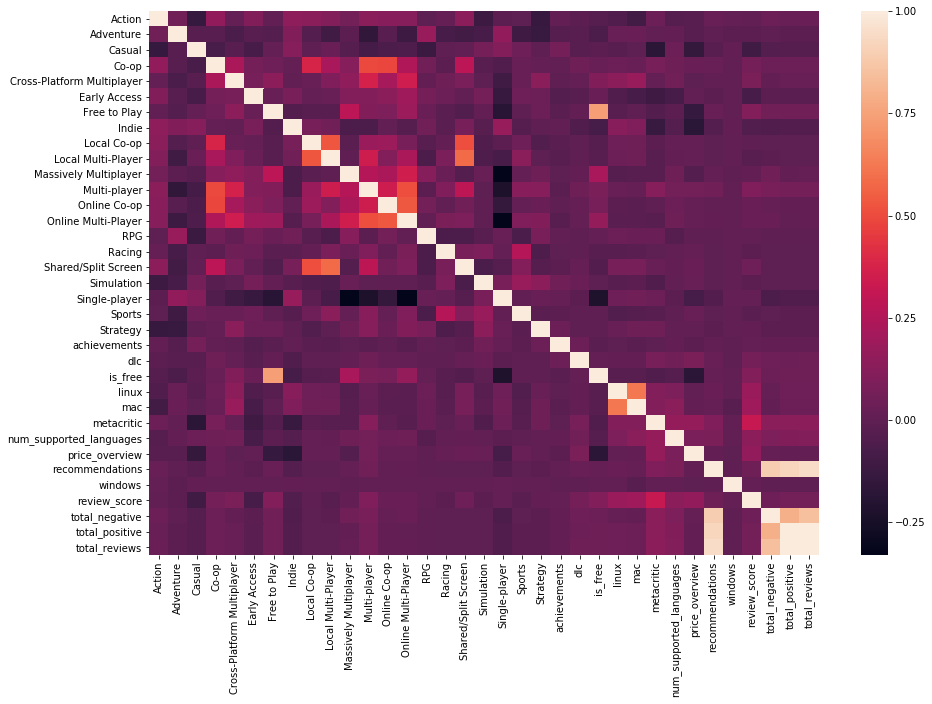

In [1502]:
correlations = final_df0.corr()
plt.figure(figsize=(15,10))
sns.heatmap(correlations)

In [1503]:
final_df0.reset_index(inplace=True)
y = final_df0.price_overview
X = final_df0.drop(["price_overview"], axis=1)

In [1504]:
from sklearn.preprocessing import StandardScaler
x_col = X[["recommendations", 'num_supported_languages','review_score', 'total_negative', 'achievements', 'dlc',
        'total_positive', 'total_reviews', 'required_age','metacritic']]
X_scale = StandardScaler().fit_transform(x_col)

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


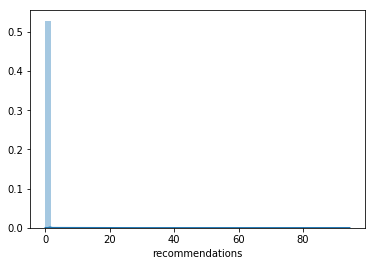

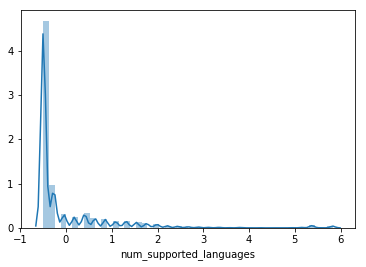

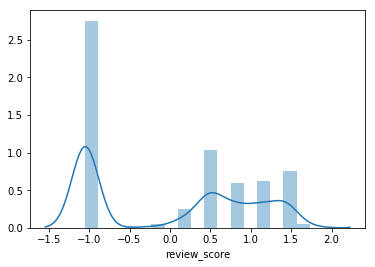

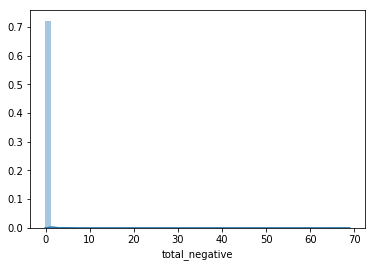

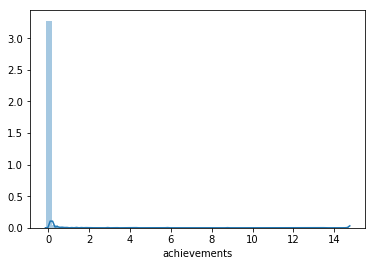

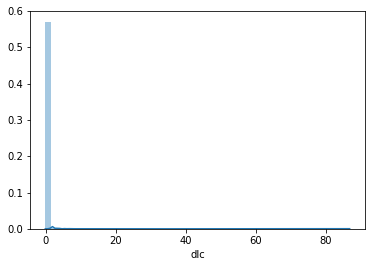

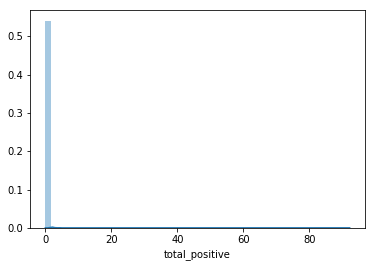

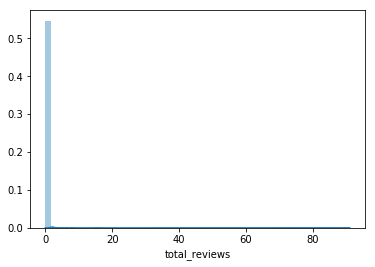

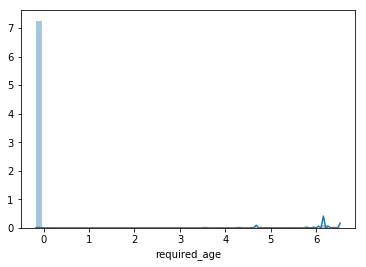

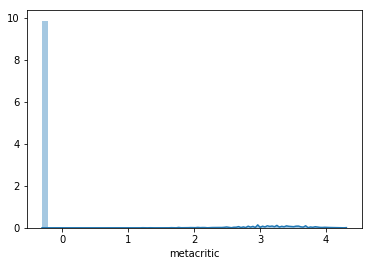

In [1373]:
for col in x_col:
    sns.distplot(X[col])
    plt.show()

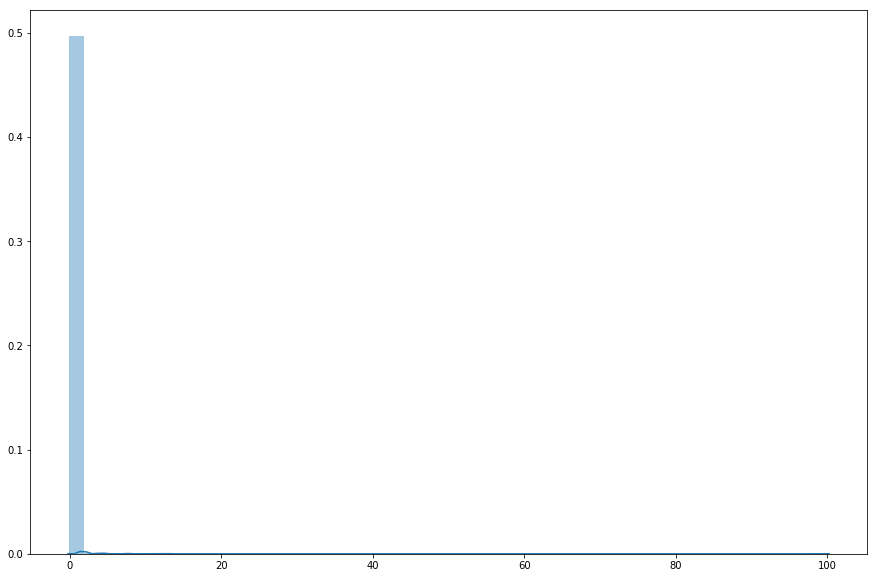

In [1386]:
plt.figure(figsize=(15,10))
sns.distplot(y)

In [1505]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
pca.fit(X_scale)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

Text(0, 0.5, 'Variance Ration Explanation')

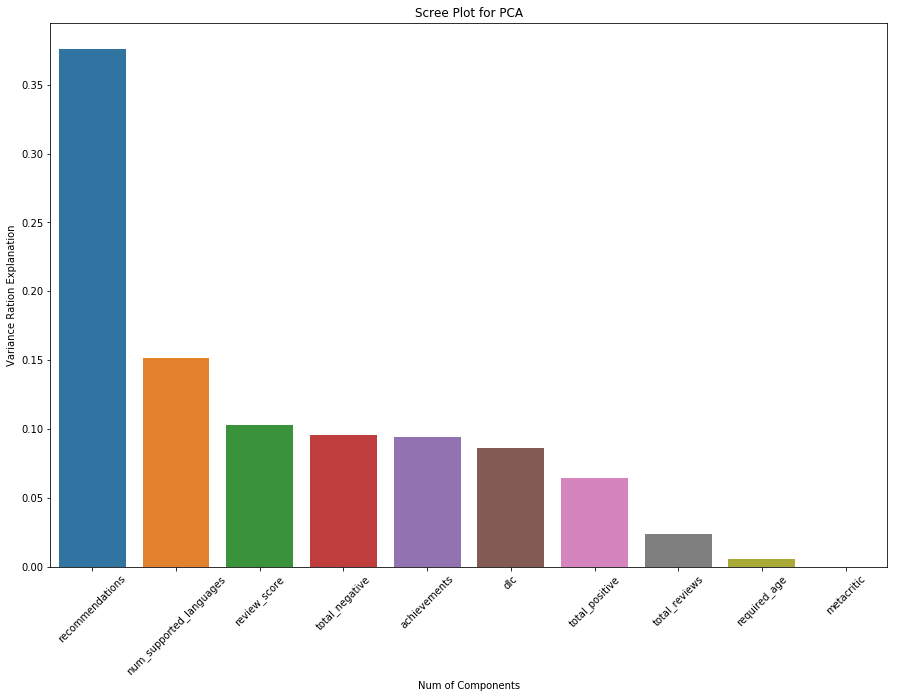

In [1506]:
index = X_scaled_df.columns
plt.figure(figsize=(15,10))
sns.barplot(index, pca.explained_variance_ratio_ )
plt.xticks(rotation=45)
plt.title("Scree Plot for PCA")
plt.xlabel("Num of Components")
plt.ylabel("Variance Ration Explanation")

### Observation

PCA shows us that we can drop required_age and metacritic. We will drop the two features mention prior and replace the other features with their scaled values

In [1507]:
X_scaled_df = pd.DataFrame(data=X_scale, columns=["recommendations", 'num_supported_languages','review_score', 'total_negative', 'achievements', 'dlc',
        'total_positive', 'total_reviews', 'required_age','metacritic'])

In [1508]:
X_drop = X.drop(x_col, axis=1)

In [1509]:
X = X_drop.merge(X_scaled_df, on=X_drop.index)

In [1510]:
X_final = X.drop(["required_age", "metacritic"], axis=1)

In [1511]:
X.drop(["key_0","index"], axis=1,inplace=True)

In [1512]:
y.mean()

7.114850799928532

In [1513]:
y.std()

12.271757173162856

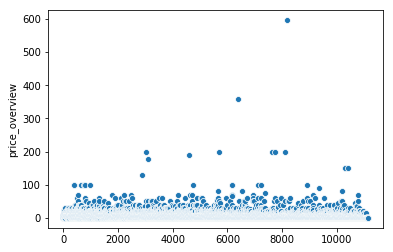

In [1514]:
x_lin = np.linspace(1, 11126, 11126)
sns.scatterplot(x_lin, y)

In [1518]:
y_df = pd.DataFrame(y)

0.0

In [1520]:
type(y)

pandas.core.series.Series

In [1405]:
y_df = pd.DataFrame(y)
y_df[y_df.price_overview > 1000]

,price_overview
2790,4500.0


In [1419]:
final_df[final_df.price_overview > 100].name

669                               Call of Duty®: Black Ops
1699     Resident Evil Revelations / Biohazard Revelations
3652                                           Eisenbahn X
5086     Wish -tale of the sixteenth night of lunar month-
5642                                Street Warriors Online
5854                                        The Music Room
6040                         3DF Zephyr Lite Steam Edition
6154                                         akeytsu Indie
9436                                    Marmoset Toolbag 3
11431                                                Minit
12929                                       CrisisActionVR
14039                      VEGAS Pro 15 Edit Steam Edition
16324                 Xara Designer Pro X 15 Steam Edition
16447    Home Architect - Design your floor plans in 3D...
17147                                   INFINITY CHALLENGE
17276                                   ADR-Labelling Game
21146                               Substance Painter 20

In [1303]:
pca1 = PCA(n_components=7)
pca1.fit(X_scale)

PCA(copy=True, iterated_power='auto', n_components=7, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [1304]:
pca1.explained_variance_ratio_

array([0.37603284, 0.15129879, 0.1028904 , 0.0953312 , 0.09391588,
       0.08618171, 0.06473668])

In [1261]:
X.columns

Index(['Action', 'Adventure', 'Casual', 'Co-op', 'Cross-Platform Multiplayer',
       'Early Access', 'Free to Play', 'Indie', 'Local Co-op',
       'Local Multi-Player', 'Massively Multiplayer', 'Multi-player',
       'Online Co-op', 'Online Multi-Player', 'RPG', 'Racing',
       'Shared/Split Screen', 'Simulation', 'Single-player', 'Sports',
       'Strategy', 'achievements', 'dlc', 'is_free', 'linux', 'mac',
       'metacritic', 'num_supported_languages', 'recommendations',
       'required_age', 'windows', 'review_score', 'total_negative',
       'total_positive', 'total_reviews'],
      dtype='object')

In [1338]:
X_scale

array([[ 2.79761364,  1.08597418,  1.73150082, ...,  3.05658058,
        -0.16961757,  3.92369232],
       [ 0.08573065,  1.31164748,  1.42277695, ...,  0.18784127,
        -0.16961757, -0.30833537],
       [ 0.05077355,  0.40895426,  1.42277695, ...,  0.12011984,
        -0.16961757,  3.4908713 ],
       ...,
       [-0.0349515 , -0.49373895, -1.047014  , ..., -0.05254181,
        -0.16961757, -0.30833537],
       [-0.0349515 , -0.49373895, -1.047014  , ..., -0.05254181,
        -0.16961757, -0.30833537],
       [-0.0349515 , -0.49373895, -1.047014  , ..., -0.05254181,
        -0.16961757, -0.30833537]])

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [1320]:
X_scaled_df = pd.DataFrame(data=X_scale, columns=["recommendations", 'num_supported_languages','review_score', 'total_negative', 'achievements', 'dlc',
        'total_positive', 'total_reviews', 'required_age','metacritic'])

In [1322]:
X_scaled_df

,recommendations,num_supported_languages,review_score,total_negative,achievements,dlc,total_positive,total_reviews,required_age,metacritic
0,2.797614,1.085974,1.731501,0.499428,-0.120398,-0.084856,3.433450,3.056581,-0.169618,3.923692
1,0.085731,1.311647,1.422777,0.177711,-0.120398,-0.084856,0.183507,0.187841,-0.169618,-0.308335
2,0.050774,0.408954,1.422777,0.054549,-0.120398,-0.084856,0.128399,0.120120,-0.169618,3.490871
3,0.004987,1.311647,1.422777,0.021744,-0.120398,-0.084856,0.025934,0.026000,-0.169618,-0.308335
4,0.151486,0.183281,1.422777,0.038434,-0.120398,-0.084856,0.261540,0.232896,-0.169618,-0.308335
5,0.055409,1.311647,1.422777,0.147784,-0.120398,-0.084856,0.151002,0.154820,-0.169618,-0.308335
6,0.922925,1.085974,1.731501,0.262888,-0.120398,0.085684,1.428161,1.280339,-0.169618,4.308422
7,0.346544,1.085974,1.422777,0.212818,-0.120398,-0.084856,0.394035,0.375987,-0.169618,2.817594
8,0.107823,-0.042392,1.422777,0.083901,-0.120398,-0.084856,0.175973,0.166107,-0.169618,3.106142
9,0.415939,5.148094,1.422777,10.657980,1.425015,0.085684,30.778714,28.402117,-0.169618,4.116057


In [1323]:
X_scaled_df.shape

(11126, 10)

In [1324]:
X.shape

(11126, 35)

In [1325]:
X[["recommendations", 'num_supported_languages','review_score', 'total_negative', 'achievements', 'dlc',
        'total_positive', 'total_reviews', 'required_age','metacritic']] = X_scaled_df

In [1333]:
X.reset_index(inplace=True)

In [1335]:
X

,index,Action,Adventure,Casual,Co-op,Cross-Platform Multiplayer,Early Access,Free to Play,Indie,Local Co-op,...,mac,metacritic,num_supported_languages,recommendations,required_age,windows,review_score,total_negative,total_positive,total_reviews
0,0,1,0,0,0,0,0,0,0,0,...,1,3.923692,1.085974,2.797614,-0.169618,1,1.731501,0.499428,3.433450,3.056581
1,1,1,0,0,0,0,0,0,0,0,...,1,-0.308335,1.311647,0.085731,-0.169618,1,1.422777,0.177711,0.183507,0.187841
2,2,1,0,0,0,0,0,0,0,0,...,1,3.490871,0.408954,0.050774,-0.169618,1,1.422777,0.054549,0.128399,0.120120
3,3,1,0,0,0,0,0,0,0,0,...,1,-0.308335,1.311647,0.004987,-0.169618,1,1.422777,0.021744,0.025934,0.026000
4,4,1,0,0,0,0,0,0,0,0,...,1,-0.308335,0.183281,0.151486,-0.169618,1,1.422777,0.038434,0.261540,0.232896
5,5,1,0,0,0,0,0,0,0,0,...,1,-0.308335,1.311647,0.055409,-0.169618,1,1.422777,0.147784,0.151002,0.154820
6,6,1,0,0,0,0,0,0,0,0,...,1,4.308422,1.085974,0.922925,-0.169618,1,1.731501,0.262888,1.428161,1.280339
7,7,1,0,0,0,0,0,0,0,0,...,1,2.817594,1.085974,0.346544,-0.169618,1,1.422777,0.212818,0.394035,0.375987
8,8,1,0,0,0,0,0,0,0,0,...,1,3.106142,-0.042392,0.107823,-0.169618,1,1.422777,0.083901,0.175973,0.166107
9,9,1,0,0,0,1,0,1,0,0,...,1,4.116057,5.148094,0.415939,-0.169618,1,1.422777,10.657980,30.778714,28.402117


In [918]:
len(final_df )

8113

In [919]:
final_df[final_df.Action == 1].price_overview.mean()

7.735704526046744

In [920]:
final_df.is_free.mean()

0.09010230494268458

In [921]:
len(final_df[final_df.achievements>0])

3814

In [922]:
len(final_df[(final_df.price_overview>50)])

51

In [848]:
len(final_df[final_df.Indie==1])

8339

In [849]:
len(final_df[final_df.Indie==0])

5034

In [841]:
final_df.price_overview.mean()

7.182211171765133

In [923]:
len(final_df[final_df.review_score > 0])

3915

In [924]:
len(final_df[final_df.metacritic > 0])

453

In [925]:
len(final_df[final_df.total_positive > 0])

6457

In [926]:
len(final_df[final_df.total_negative > 0])

5640

In [927]:
len(final_df[final_df.recommendations > 0])

1066

In [928]:
# test = final_df[(final_df.type == "game") | (final_df.type == "dlc")]
len(test)

13373

In [384]:
df_test_almost_clean = pd.DataFrame(test_price1)
df_test_almost_clean2 = pd.DataFrame(test_price2)

In [393]:
df_test_almost_clean.shape

(4521, 42)

In [287]:
pd.DataFrame(test_dev).shape

(4521, 42)

In [520]:
pd.DataFrame(cleaned_15k)

,about_the_game,achievements,categories,demos,developers,dlc,genres,is_free,metacritic,name,...,platforms,price_overview,publishers,recommendations,release_date,required_age,reviews,steam_appid,supported_languages,type
0,<i>&quot;I’m a 90s kid who didn’t get the chan...,NaN,"[{'id': 2, 'description': 'Single-player'}, {'...","[{'appid': 1019840, 'description': ''}]",[The Midnight Team],NaN,"[{'id': '1', 'description': 'Action'}, {'id': ...",False,NaN,Starxium 20XX,...,"{'windows': True, 'mac': False, 'linux': False}",NaN,[The Midnight Team],NaN,"{'coming_soon': True, 'date': 'Coming soon™'}",0,NaN,1013560,English,game
1,Akagi Ai is unexpectedly stabbed on her way ho...,"{'total': 15, 'highlighted': [{'name': 'Stabbe...","[{'id': 2, 'description': 'Single-player'}, {'...",NaN,[John Ohno],NaN,"[{'id': '4', 'description': 'Casual'}, {'id': ...",False,NaN,Manna for our Malices,...,"{'windows': True, 'mac': True, 'linux': True}","{'currency': 'USD', 'initial': 499, 'final': 4...",[Double Mojo],NaN,"{'coming_soon': False, 'date': 'Feb 11, 2019'}",0,NaN,1013580,English,game
2,Hop into a classic Game Boy inspired metroidva...,"{'total': 18, 'highlighted': [{'name': 'Nimble...","[{'id': 2, 'description': 'Single-player'}, {'...",NaN,[Adventure Islands],NaN,"[{'id': '1', 'description': 'Action'}, {'id': ...",False,NaN,Tiny Dangerous Dungeons,...,"{'windows': True, 'mac': True, 'linux': False}","{'currency': 'USD', 'initial': 499, 'final': 4...",[Adventure Islands],NaN,"{'coming_soon': False, 'date': 'Mar 1, 2019'}",0,NaN,1013650,English,game
3,&quot;Pursuer&quot; - psychological horror in ...,"{'total': 10, 'highlighted': [{'name': 'Church...","[{'id': 2, 'description': 'Single-player'}, {'...",NaN,[TheBlavas],NaN,"[{'id': '1', 'description': 'Action'}, {'id': ...",False,NaN,Pursuer,...,"{'windows': True, 'mac': False, 'linux': False}","{'currency': 'USD', 'initial': 1399, 'final': ...",[TheBlavas],NaN,"{'coming_soon': False, 'date': 'Mar 11, 2019'}",0,NaN,1013660,English<strong>*</strong><br><strong>*</strong...,game
4,The Saint Paul Multiplayer game is in pre-Alph...,{'total': 0},"[{'id': 1, 'description': 'Multi-player'}, {'i...",NaN,[Cleyton Jonnas da Silva],NaN,"[{'id': '1', 'description': 'Action'}, {'id': ...",False,NaN,Saint Paul Pre-Alpha,...,"{'windows': True, 'mac': False, 'linux': False}",NaN,[Saint Paul Studios],NaN,"{'coming_soon': False, 'date': 'Feb 3, 2019'}",0,NaN,1013680,"English<strong>*</strong>, Portuguese - Brazil...",game
5,Prepare to lead your favorite school to champi...,{'total': 0},"[{'id': 2, 'description': 'Single-player'}]",NaN,[Wolverine Studios],NaN,"[{'id': '23', 'description': 'Indie'}, {'id': ...",False,NaN,Draft Day Sports: College Football 2019,...,"{'windows': True, 'mac': False, 'linux': False}","{'currency': 'USD', 'initial': 3499, 'final': ...",[Wolverine Studios],NaN,"{'coming_soon': False, 'date': 'Feb 8, 2019'}",0,NaN,1013700,English,game
6,"<h2 class=""bb_tag"">Pick up this powerful pack ...",{'total': 0},"[{'id': 1, 'description': 'Multi-player'}, {'i...",NaN,[Trion Worlds],NaN,"[{'id': '37', 'description': 'Free to Play'}, ...",False,NaN,RIFT - Laethys' Indulgence Power Pack,...,"{'windows': True, 'mac': False, 'linux': False}","{'currency': 'USD', 'initial': 2999, 'final': ...",[Trion Worlds],NaN,"{'coming_soon': False, 'date': 'Jan 23, 2019'}",0,NaN,1013740,"French<strong>*</strong>, German<strong>*</str...",dlc
7,&quot;Jigsaw Masterpieces : Masterpieces of Wo...,NaN,"[{'id': 2, 'description': 'Single-player'}, {'...",NaN,[BottleCube inc.],NaN,"[{'id': '4', 'description': 'Casual'}]",False,NaN,Jigsaw Masterpieces : Masterpieces of World - ...,...,"{'windows': True, 'mac': True, 'linux': False}","{'currency': 'USD', 'initial': 299, 'final': 2...",[BottleCube inc.],NaN,"{'coming_soon': False, 'date': 'Mar 11, 2019'}",0,NaN,1013780,"English, Japanese",dlc
8,This is a logical puzzle game needs brain.<br>...,"{'total': 2, 'highlighted': [{'name': 'Thinker...","[{'id': 2, 'description': 'Singl

In [79]:
c_data = pd.DataFrame(cleaned_15K)

In [259]:
c_data.columns

Index(['about_the_game', 'achievements', 'categories', 'demos', 'developers',
       'dlc', 'genres', 'is_free', 'metacritic', 'name', 'pc_requirements',
       'platforms', 'price_overview', 'publishers', 'recommendations',
       'release_date', 'required_age', 'reviews', 'steam_appid',
       'supported_languages', 'type'],
      dtype='object')

In [324]:
c_data.head()

,about_the_game,achievements,categories,demos,developers,dlc,genres,is_free,metacritic,name,...,platforms,price_overview,publishers,recommendations,release_date,required_age,reviews,steam_appid,supported_languages,type
0,<i>&quot;I’m a 90s kid who didn’t get the chan...,NaN,"[{'id': 2, 'description': 'Single-player'}, {'...","[{'appid': 1019840, 'description': ''}]",[The Midnight Team],NaN,"[{'id': '1', 'description': 'Action'}, {'id': ...",False,NaN,Starxium 20XX,...,"{'windows': True, 'mac': False, 'linux': False}",NaN,[The Midnight Team],NaN,"{'coming_soon': True, 'date': 'Coming soon™'}",0,NaN,1013560,English,game
1,Akagi Ai is unexpectedly stabbed on her way ho...,"{'total': 15, 'highlighted': [{'name': 'Stabbe...","[{'id': 2, 'description': 'Single-player'}, {'...",NaN,[John Ohno],NaN,"[{'id': '4', 'description': 'Casual'}, {'id': ...",False,NaN,Manna for our Malices,...,"{'windows': True, 'mac': True, 'linux': True}","{'currency': 'USD', 'initial': 499, 'final': 4...",[Double Mojo],NaN,"{'coming_soon': False, 'date': 'Feb 11, 2019'}",0,NaN,1013580,English,game
2,Hop into a classic Game Boy inspired metroidva...,"{'total': 18, 'highlighted': [{'name': 'Nimble...","[{'id': 2, 'description': 'Single-player'}, {'...",NaN,[Adventure Islands],NaN,"[{'id': '1', 'description': 'Action'}, {'id': ...",False,NaN,Tiny Dangerous Dungeons,...,"{'windows': True, 'mac': True, 'linux': False}","{'currency': 'USD', 'initial': 499, 'final': 4...",[Adventure Islands],NaN,"{'coming_soon': False, 'date': 'Mar 1, 2019'}",0,NaN,1013650,English,game
3,&quot;Pursuer&quot; - psychological horror in ...,"{'total': 10, 'highlighted': [{'name': 'Church...","[{'id': 2, 'description': 'Single-player'}, {'...",NaN,[TheBlavas],NaN,"[{'id': '1', 'description': 'Action'}, {'id': ...",False,NaN,Pursuer,...,"{'windows': True, 'mac': False, 'linux': False}","{'currency': 'USD', 'initial': 1399, 'final': ...",[TheBlavas],NaN,"{'coming_soon': False, 'date': 'Mar 11, 2019'}",0,NaN,1013660,English<strong>*</strong><br><strong>*</strong...,game
4,The Saint Paul Multiplayer game is in pre-Alph...,{'total': 0},"[{'id': 1, 'description': 'Multi-player'}, {'i...",NaN,[Cleyton Jonnas da Silva],NaN,"[{'id': '1', 'description': 'Action'}, {'id': ...",False,NaN,Saint Paul Pre-Alpha,...,"{'windows': True, 'mac': False, 'linux': False}",NaN,[Saint Paul Studios],NaN,"{'coming_soon': False, 'date': 'Feb 3, 2019'}",0,NaN,1013680,"English<strong>*</strong>, Portuguese - Brazil...",game


In [612]:
# data_df_clean.to_csv("cleaned_v1")

In [514]:
data_from_steam[0]

{'332150': {'data': {'type': 'game',
   'name': 'LEVEL UP!',
   'steam_appid': 332150,
   'required_age': 0,
   'is_free': False,
   'detailed_description': "In this side-scrolling platformer/shooter with finely destructible levels and bosses you level up your character by literally going up to the next level. Each level-up earns you some points to spend on upgrades: more health, firepower, new weapons, skills, etc. Also it's made of voxels, so you can destroy walls and dig tunnels or trenches to hide from enemy fire, and blast holes in huge bosses to get to the vulnerable spots inside them.",
   'about_the_game': "In this side-scrolling platformer/shooter with finely destructible levels and bosses you level up your character by literally going up to the next level. Each level-up earns you some points to spend on upgrades: more health, firepower, new weapons, skills, etc. Also it's made of voxels, so you can destroy walls and dig tunnels or trenches to hide from enemy fire, and blast h

In [929]:
y = final_df.price_overview
X = final_df.drop("price_overview", axis=1)

In [916]:
# final_df = final_df[(final_df.type == "game")]

In [930]:
final_df.price_overview.mean()

7.340126956735558

In [987]:
review_only = X[["reviews"]].copy()

In [941]:
len(review_only[review_only.reviews == ""])

1283

In [1092]:
from nltk.tokenize import word_tokenize
import sklearn.metrics as sklm
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import string

In [1093]:
stops = stopwords.words("english") + list(string.punctuation)
stops += ["\n", "...", "[sic.]", "[h1]",  "....", "$", "''", "--"]
lemmatizer = WordNetLemmatizer()

def clean_text_from_df(stop):
    tokenization = []
    for i in range(stop):
        tokenized_w = review_only.reviews.str.lower()[i]
        tokenized_w = tokenized_w.replace("/", "")
        tokenized_w = tokenized_w.replace("`'", "")
        tokenized_w = word_tokenize( tokenized_w)
        if tokenized_w != []:
            stops_removed = [token for token in tokenized_w if token not in stops]
            tokenization.append(stops_removed)
    return tokenization 


# lemmatizer.lemmatize(review_only.reviews.str.lower()[0])

In [1054]:
word_tokens = clean_text_from_df(len(review_only ))

In [1077]:
word_tokens[100]

['wrong',
 'game',
 'everytime',
 'went',
 'loading',
 'screen',
 'two',
 'monitors',
 'went',
 'blink',
 'like',
 'restarted',
 'messed',
 'seconds',
 'ta',
 'gra',
 'złe',
 'ustawienia',
 'w',
 'stosunku',
 'sterowania',
 'pod',
 'shift',
 'jest',
 'skok',
 'przez',
 'co',
 'trzeba',
 'się',
 'odzwyczajic',
 'od',
 'spacji',
 'mogli',
 'też',
 'zmodywikować',
 'celownik',
 'one',
 'hand',
 'full',
 'first',
 'games',
 'console',
 'played',
 'game',
 'judging',
 'game',
 'days',
 'standards',
 'quite',
 'hard',
 'run',
 'bullets',
 'ca',
 "n't",
 'finish',
 'level',
 'get',
 'stuck',
 'trying',
 'figure',
 'get',
 'past',
 'simple',
 'level',
 'design',
 "n't",
 'recommend',
 'game',
 'dnf10',
 'challenging',
 'game',
 'compelling',
 'story',
 'stealth',
 'aspect',
 'excellent',
 'opinion',
 'mere',
 'shoot-em-up',
 'optional',
 'stealth',
 'game',
 'minimal',
 'ammunition',
 'supplies',
 'forced',
 'find',
 'options',
 'sneaking',
 'past',
 'guards',
 'cameras',
 'knocking',
 'guards